In [1]:
! pip install underthesea==6.6.0  pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import re
import string
import numpy as np
from underthesea import word_tokenize
from pyvi import ViTokenizer
from bs4 import BeautifulSoup

# Model

In [3]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np


In [8]:
df_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/result_data.csv')
df_new.head(10)

,old_data,label,data_clean
0,"Shop giao sản phẩm đã qua sử dụng , không hài ...",0,shop giao sản_phẩm đã qua sử_dụng không hài_lò...
1,"Đóng gói cẩn thận, sp mới và nhỏ gọn. Rất hài ...",4,đóng_gói cẩn_thận sp mới và nhỏ gọn rất hài_lò...
2,"Sản phẩm nhỏ gọn, giao hàng rất nhanh.",1,sản_phẩm nhỏ gọn giao hàng rất nhanh
3,sản phẩm rất chuẩn so vs quảng cáo.,1,sản_phẩm rất chuẩn so với quảng_cáo
4,Nhỏ gọn gê,1,nhỏ gọn gê
5,"ổ cứng chạy rất nhanh, nhỏ hơn mình nghĩ nhưng...",1,ổ_cứng chạy rất nhanh nhỏ hơn mình nghĩ nhưng ...
6,Sản phẩm chất lượng chính hãng. Rất hài lòng. ...,1,sản_phẩm_chất_lượng chính hãng rất hài_lòng nh...
7,"Hàng giao nhanh, xai rất ổn định. Mình xài cũn...",4,hàng giao nhanh xai rất ổn_định mình xài cũng ...
8,"Ổ cứng nhỏ gọn và tốc độ truyền dữ liệu nhanh,...",1,ổ_cứng nhỏ gọn và tốc_độ truyền dữ_liệu nhanh ...
9,"Tốc độ nhanh, nhỏ gọn hơn nhiều so với mình tư...",1,tốc_độ nhanh nhỏ gọn hơn nhiều so với mình tưở...


<Axes: xlabel='label'>

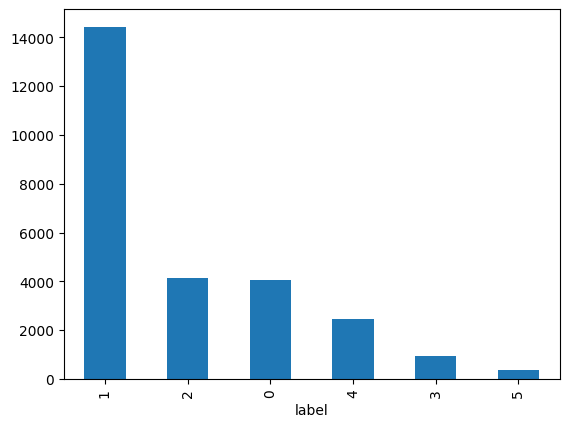

In [9]:
df_new['label'].value_counts().plot.bar()

In [10]:
df_new['label'].value_counts()

label
1    14436
2     4140
0     4070
4     2462
3      931
5      382
Name: count, dtype: int64

In [11]:
df_5000 = pd.DataFrame()
for label in df_new['label'].unique():
  df_label_subset = df_new[df_new['label'] == label].head(n=5000)
  df_5000 = pd.concat([df_5000, df_label_subset])

df_5000.shape

(16985, 3)

<Axes: xlabel='label'>

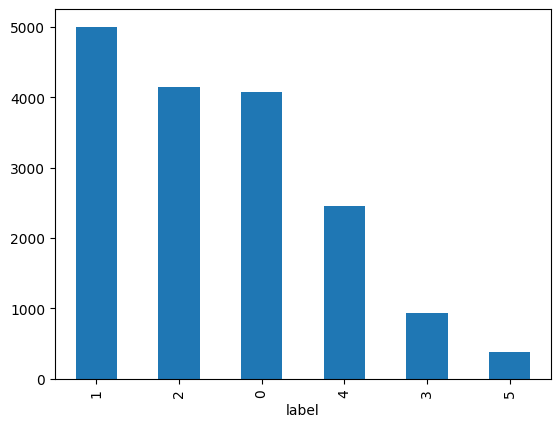

In [12]:
df_5000['label'].value_counts().plot.bar()

# Chuẩn bị dữ liệu

In [13]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [14]:
X = df_5000['data_clean']
y = df_5000['label']

le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
# Tạo tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
# Lấy độ dài của câu dài nhất
max_len = max(len(seq) for seq in tokenizer.texts_to_sequences(X))

# Vector hóa
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequence với độ dài của câu dài nhất
X_pad = pad_sequences(X_seq, maxlen=max_len)

# One-hot encoding
y_onehot = to_categorical(y)

print(f'max len: {max_len}\nmax_words: {len(tokenizer.word_index)}')

max len: 762
max_words: 10334


In [16]:
max_words = len(tokenizer.word_index)

In [17]:
print(tokenizer.word_index)

{'không': 1, 'được': 2, 'thì': 3, 'hàng': 4, 'mua': 5, 'máy': 6, 'có': 7, 'mình': 8, 'rất': 9, 'là': 10, 'nhưng': 11, 'tốt': 12, 'nhanh': 13, 'dùng': 14, 'sản': 15, 'giá': 16, 'phẩm': 17, 'bị': 18, 'và': 19, 'giao': 20, 'pin': 21, 'hình': 22, 'mà': 23, 'với': 24, 'mới': 25, '1': 26, 'này': 27, 'nên': 28, 'như': 29, 'ok': 30, 'lại': 31, 'nghe': 32, 'đẹp': 33, 'quá': 34, 'cũng': 35, 'cho': 36, 'ổn': 37, 'hơi': 38, 'shop': 39, 'lượng': 40, 'hơn': 41, 'khi': 42, 'đã': 43, 'dụng': 44, 'thấy': 45, 'chất': 46, 'còn': 47, 'về': 48, 'nhận': 49, 'màn': 50, 'của': 51, '2': 52, 'sao': 53, 'cái': 54, 'để': 55, 'ngày': 56, 'rồi': 57, 'khá': 58, 'chưa': 59, 'phải': 60, 'chỉ': 61, 'game': 62, 'trong': 63, 'cảm': 64, 'sử': 65, 'chơi': 66, 'sạc': 67, 'tiki': 68, 'điện': 69, 'gói': 70, 'gì': 71, 'ra': 72, 'xài': 73, 'tai': 74, 'lúc': 75, 'lỗi': 76, 'sau': 77, 'vẫn': 78, 'nói': 79, 'đóng': 80, 'hay': 81, 'nhiều': 82, 'độ': 83, 'biết': 84, 'màu': 85, 'lần': 86, 'vào': 87, 'thoại': 88, 'tầm': 89, 'con': 90,

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_pad, y_onehot, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
print(f'X_train: {X_train.shape}\nX_val: {X_val.shape}\nX_test: {X_test.shape}')

X_train: (11889, 762)
X_val: (2548, 762)
X_test: (2548, 762)


# Buld Model Word Embeddings

In [27]:
from keras.models import Sequential
from keras.layers import Embedding
from sklearn.metrics import accuracy_score

In [23]:
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 762, 100)          1033400   
                                                                 
Total params: 1033400 (3.94 MB)
Trainable params: 1033400 (3.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
X_train_embed = model.predict(X_train)

372/372 [==============================] - 1s 2ms/step


In [25]:
X_test_embed = model.predict(X_test)

80/80 [==============================] - 0s 1ms/step


In [26]:
X_train_embed.shape

(11889, 762, 100)

# Buid model

In [40]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras import optimizers

## Model 1

In [31]:

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 762, 100)          1033400   
                                                                 
 lstm_6 (LSTM)               (None, 762, 128)          117248    
                                                                 
 batch_normalization_4 (Bat  (None, 762, 128)          512       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 762, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 762, 64)           49408     
                                                                 
 batch_normalization_5 (Bat  (None, 762, 64)           256       
 chNormalization)                                     

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs=20, verbose=1)

Epoch 1/20
744/744 [==============================] - 104s 126ms/step - loss: 1.3916 - accuracy: 0.4185 - val_loss: 2.2185 - val_accuracy: 0.2484
Epoch 2/20
744/744 [==============================] - 63s 85ms/step - loss: 1.0966 - accuracy: 0.5629 - val_loss: 1.5401 - val_accuracy: 0.3387
Epoch 3/20
744/744 [==============================] - 60s 80ms/step - loss: 0.9767 - accuracy: 0.6246 - val_loss: 2.0322 - val_accuracy: 0.2614
Epoch 4/20
744/744 [==============================] - 60s 80ms/step - loss: 0.9058 - accuracy: 0.6513 - val_loss: 1.5539 - val_accuracy: 0.4286
Epoch 5/20
744/744 [==============================] - 59s 80ms/step - loss: 0.8405 - accuracy: 0.6795 - val_loss: 1.7318 - val_accuracy: 0.3140
Epoch 6/20
744/744 [==============================] - 57s 77ms/step - loss: 0.7979 - accuracy: 0.7013 - val_loss: 1.9300 - val_accuracy: 0.2771
Epoch 7/20
744/744 [==============================] - 59s 79ms/step - loss: 0.7378 - accuracy: 0.7276 - val_loss: 1.2665 - val_accurac

In [33]:
def plot_training_history(history):
    # Vẽ biểu đồ loss và độ chính xác trên tập huấn luyện và tập kiểm thử
    plt.figure(figsize=(12, 4))

    # Biểu đồ độ chính xác
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Biểu đồ loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

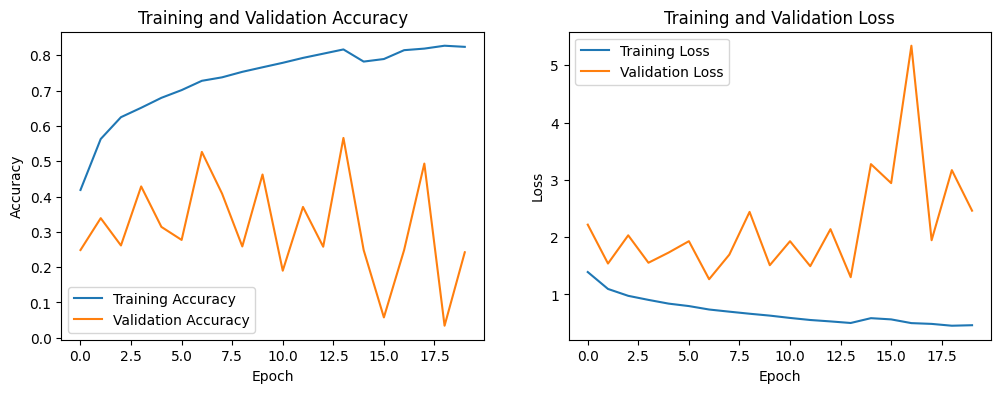

In [34]:
plot_training_history(history)

In [35]:
def ConfusionMatrix(cm):
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

80/80 [==============================] - 3s 28ms/step


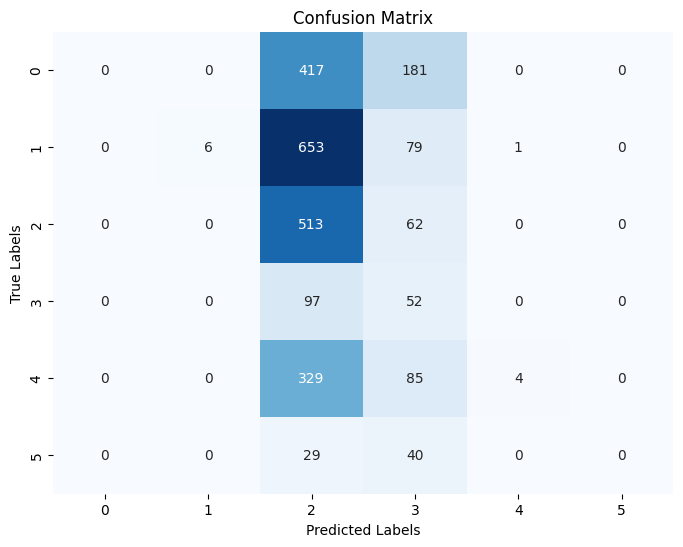

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dự đoán lớp cho tập dữ liệu kiểm tra
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Chuyển đổi từ one-hot encoding về nhãn dự đoán

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

ConfusionMatrix(cm)

In [37]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

80/80 [==============================] - 5s 63ms/step - loss: 2.4623 - accuracy: 0.2257
Test accuracy: 22.57%


## Model 2

In [38]:
model1=Sequential()
model1.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

model1.add(LSTM(128, activation='relu', return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(128,activation='relu'))

model1.add(Dropout(0.2))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(6, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 762, 100)          1033400   
                                                                 
 lstm_9 (LSTM)               (None, 762, 128)          117248    
                                                                 
 dropout_9 (Dropout)         (None, 762, 128)          0         
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 6)                

In [39]:
learning_rate = 0.01

In [41]:
model1.compile(optimizer= optimizers.Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1= model1.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs=20, verbose=1)

Epoch 1/20
 37/744 [>.............................] - ETA: 40:19 - loss: nan - accuracy: 0.2179

In [ ]:
plot_training_history(history1)

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

In [ ]:
y_pred_1 = model1.predict(X_test)
y_pred_1 = np.argmax(y_pred_1, axis=1)  # Chuyển đổi từ one-hot encoding về nhãn dự đoán

# Tính toán ma trận nhầm lẫn
cm_1 = confusion_matrix(np.argmax(y_test, axis=1), y_pred_1)

ConfusionMatrix(cm_1)